# Random Forest

In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV

In [2]:
#Load data
data = pd.read_csv(r"C:\Users\User\Desktop\Dataset\DogMoveData_csv_format\DogMoveData_merged.csv")

In [3]:
#Split dataset in features and target variable
feature_cols = ['ABack_x', 'ABack_y', 'ABack_z', 'ANeck_x', 'ANeck_y', 'ANeck_z', 'GBack_x', 'GBack_y', 'GBack_z', 'GNeck_x', 'GNeck_y', 'GNeck_z']
X = data[feature_cols] # Features
y = data['Behavior'] # Target variable

In [4]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [ ]:
#
param_grid = [{'bootstrap': [True, False],
              'max_depth' : [5, 7, 9],
              'max_features': ['sqrt', 'log2'],
              'min_samples_leaf': [1, 2, 4],
              'min_samples_split': [2, 5, 10],
         'n_estimators': [50, 100, 300]}]
grid_search = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grid, cv=5, verbose=1)
grid_search.fit(X_train, y_train)

In [14]:
final_model = RandomForestClassifier(n_estimators=300, max_depth=7, min_samples_split=2, random_state=42)

In [15]:
#Best model
#final_model = grid_search.best_estimator_
final_model

RandomForestClassifier(max_depth=7, n_estimators=300, random_state=42)

In [16]:
final_model = final_model.fit(X_train, y_train)

In [17]:
y_pred = final_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8979127352668852


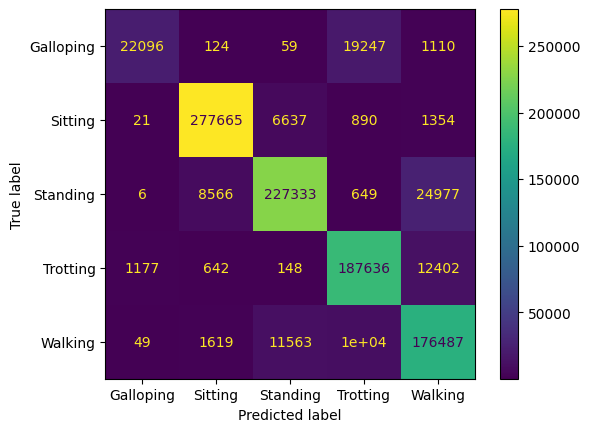

              precision    recall  f1-score   support

   Galloping       0.95      0.52      0.67     42636
     Sitting       0.96      0.97      0.97    286567
    Standing       0.93      0.87      0.90    261531
    Trotting       0.86      0.93      0.89    202005
     Walking       0.82      0.88      0.85    199804

    accuracy                           0.90    992543
   macro avg       0.90      0.83      0.85    992543
weighted avg       0.90      0.90      0.90    992543



In [18]:
#Confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Galloping', 'Sitting', 'Standing', 'Trotting', 'Walking'])
disp.plot()
plt.show()
print(classification_report(y_test, y_pred))